In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')


In [37]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data (1).csv
Saving fear_greed_index.csv to fear_greed_index (1).csv


In [38]:
# Load trader data
trader_df = pd.read_csv('historical_data.csv')

# Load sentiment data
sentiment_df = pd.read_csv('fear_greed_index.csv')


In [39]:
print("Trader Data")
display(trader_df.head())

print("Sentiment Data")
display(sentiment_df.head())


Trader Data


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [40]:
import pandas as pd

df = pd.read_csv('historical_data.csv')
print(df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [41]:
import pandas as pd

df = pd.read_csv('historical_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms', errors='coerce')
df['date'] = df['Timestamp'].dt.normalize()
df['Side'] = df['Side'].str.strip().str.lower()

daily_df = df.groupby('date').agg({
    'Execution Price': 'mean',
    'Size Tokens': 'sum',
    'Closed PnL': ['mean', 'sum'],
    'Fee': 'mean'
}).reset_index()

daily_df.columns = ['date', 'avg_exec_price', 'total_size', 'avg_pnl', 'total_pnl', 'avg_fee']
daily_df['date'] = pd.to_datetime(daily_df['date']).dt.normalize()


In [42]:
daily_df.head()


,date,avg_exec_price,total_size,avg_pnl,total_pnl,avg_fee
0,2023-03-28,1898.133333,2.513000e-01,0.000000,0.000000e+00,0.000000
1,2023-11-14,10454.871036,2.681692e+06,0.148807,1.555034e+02,2.674230
2,2024-03-09,9771.897315,3.393031e+08,25.418772,1.769655e+05,0.978567
3,2024-07-03,2663.132338,1.404851e+07,22.229713,1.587424e+05,1.224461
4,2024-10-27,5367.503277,7.831963e+07,90.504272,3.189461e+06,0.611205


In [43]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.normalize()
sentiment_df['classification'] = sentiment_df['classification'].str.strip().str.lower()
sentiment_df = sentiment_df[['date', 'classification']]


In [44]:
sentiment_df.head()


,date,classification
0,2018-02-01,fear
1,2018-02-02,extreme fear
2,2018-02-03,fear
3,2018-02-04,extreme fear
4,2018-02-05,extreme fear


In [45]:
sentiment_df.head()


,date,classification
0,2018-02-01,fear
1,2018-02-02,extreme fear
2,2018-02-03,fear
3,2018-02-04,extreme fear
4,2018-02-05,extreme fear


In [46]:
daily_df['date'].min(), daily_df['date'].max()


(Timestamp('2023-03-28 00:00:00'), Timestamp('2025-06-15 00:00:00'))

In [47]:
merged_df = pd.merge(daily_df, sentiment_df, on='date', how='inner')
merged_df.head()


,date,avg_exec_price,total_size,avg_pnl,total_pnl,avg_fee,classification
0,2023-03-28,1898.133333,2.513000e-01,0.000000,0.000000e+00,0.000000,greed
1,2023-11-14,10454.871036,2.681692e+06,0.148807,1.555034e+02,2.674230,greed
2,2024-03-09,9771.897315,3.393031e+08,25.418772,1.769655e+05,0.978567,extreme greed
3,2024-07-03,2663.132338,1.404851e+07,22.229713,1.587424e+05,1.224461,neutral
4,2024-10-27,5367.503277,7.831963e+07,90.504272,3.189461e+06,0.611205,greed


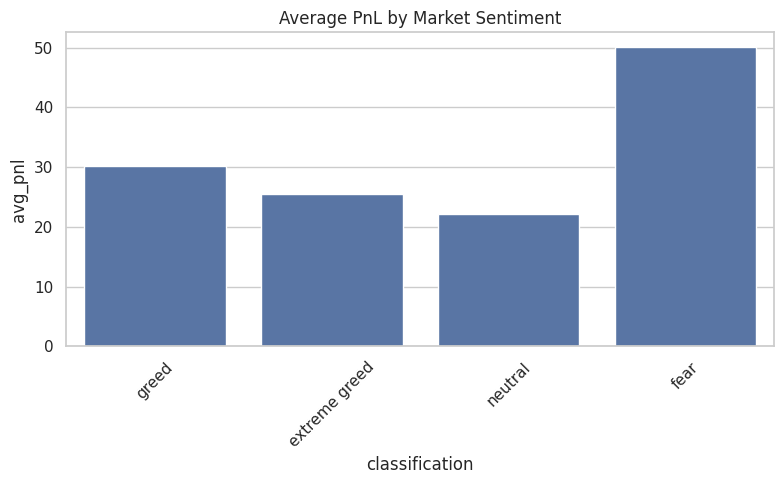

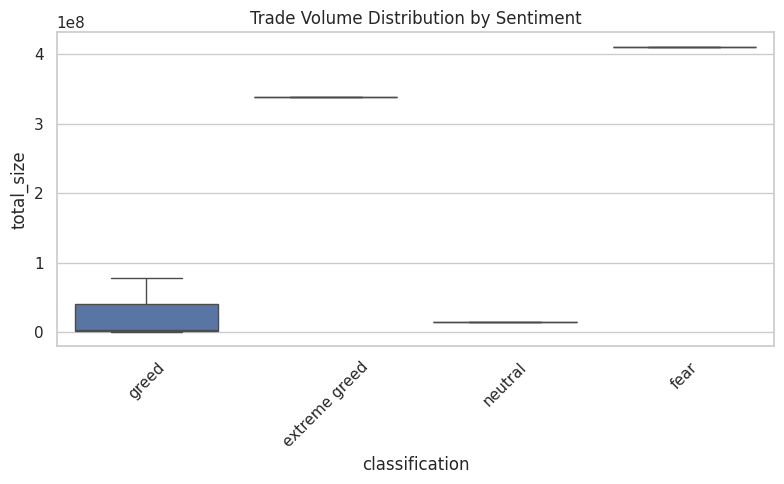

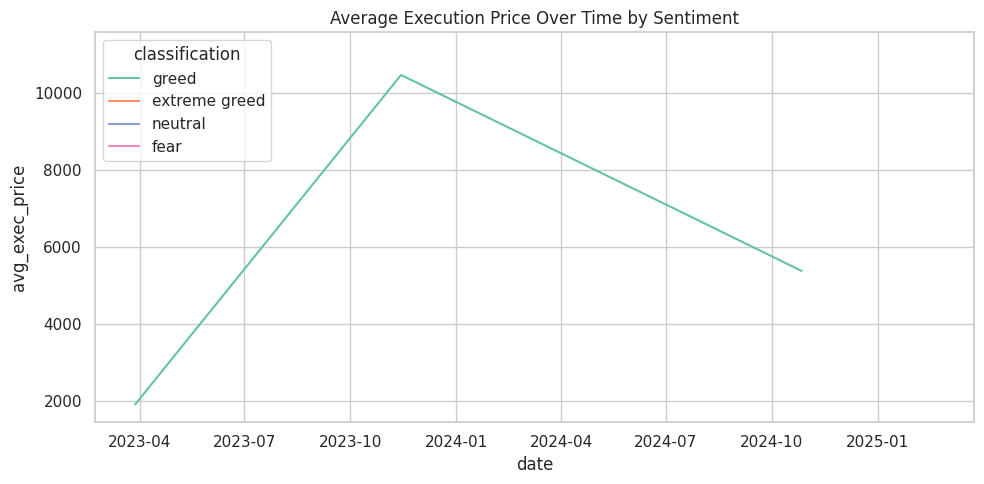

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('outputs', exist_ok=True)

# Bar Plot – avg PnL per sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='avg_pnl', estimator='mean', errorbar=None)
plt.xticks(rotation=45)
plt.title('Average PnL by Market Sentiment')
plt.tight_layout()
plt.show()
plt.savefig('outputs/avg_pnl_by_sentiment.png')
plt.close()

# Box Plot – total size distribution per sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='total_size')
plt.xticks(rotation=45)
plt.title('Trade Volume Distribution by Sentiment')
plt.tight_layout()
plt.show()
plt.savefig('outputs/volume_by_sentiment.png')
plt.close()

# Line Plot – avg_exec_price trend with sentiment as color
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df.sort_values('date'), x='date', y='avg_exec_price', hue='classification', palette='Set2')
plt.title('Average Execution Price Over Time by Sentiment')
plt.tight_layout()
plt.show()
plt.savefig('outputs/exec_price_trend.png')
plt.close()


In [49]:
os.makedirs('csv_files', exist_ok=True)
merged_df.to_csv('csv_files/merged_data.csv', index=False)
daily_df.to_csv('csv_files/daily_summary.csv', index=False)


In [51]:
import os
os.makedirs("csv_files", exist_ok=True)

merged_df.to_csv("csv_files/merged_data.csv", index=False)
daily_df.to_csv("csv_files/daily_summary.csv", index=False)
